# Decision Tree Regression

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

In [2]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]

# Validation curves

# max_leaf_nodes
- int or None, default=31
- The maximum number of leaves for each tree. Must be strictly greater than 1. If None, there is no maximum limit.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

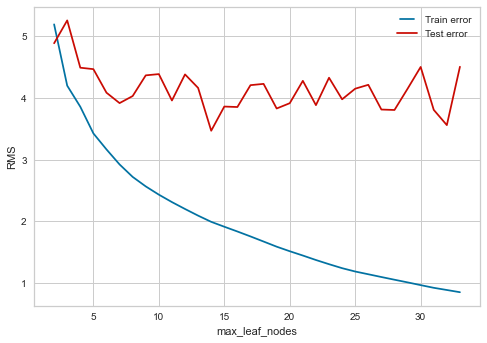

In [4]:
learning_rates = np.arange(2, 34, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(max_leaf_nodes=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_leaf_nodes')
plt.show()

# Max_depth
- int or None, default=None
- The maximum depth of each tree. The depth of a tree is the number of edges to go from the root to the deepest leaf. Depth isn’t constrained by default.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

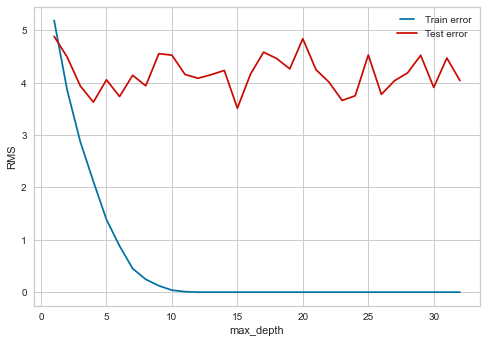

In [6]:
learning_rates = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(max_depth=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_samples_leaf
- int, default=20
- The minimum number of samples per leaf. For small datasets with less than a few hundred samples, it is recommended to lower this value since only very shallow trees would be built.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

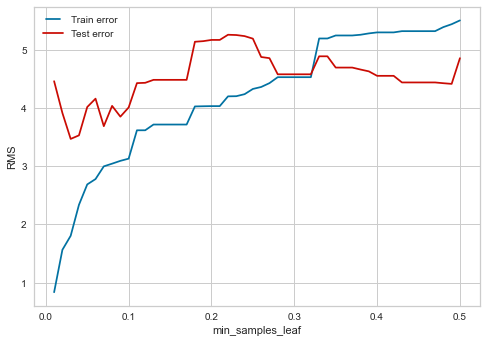

In [8]:
learning_rates = np.linspace(0.01, 0.5, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(min_samples_leaf=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

## min_samples_split

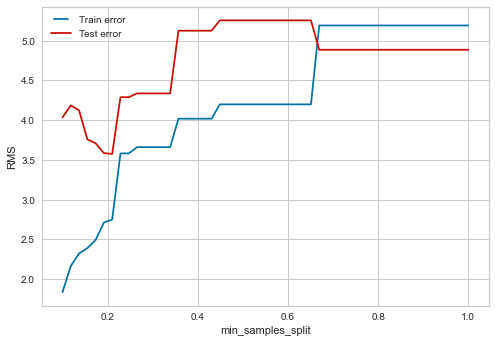

In [9]:
learning_rates = np.linspace(0.1, 1, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(min_samples_split=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_split')
plt.show()

# Random Hyperparameter Grid

In [11]:

max_features = ['auto','sqrt',0.5]
max_depth = [5,10,20,25,30]
min_samples_split = [0.05,0.06,0.07,0.08,0.09,0.1]
min_samples_leaf = [0.009,0.01,0.02,0.03,0.05]
criterion=['mse','mae','friedman_mse','poisson']
max_leaf_nodes = [2,3,4,5,6,7]

Decision_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'criterion': criterion}


In [12]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]

In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = Decision_grid, n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    6.7s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [5, 10, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 0.5],
                                        'max_leaf_nodes': [2, 5, 7, 9, 11, 13,
                                                           15],
                                        'min_samples_leaf': [0.009, 0.01, 0.02,
                                                             0.03, 0.05],
                                        'min_samples_split': [0.05, 0.06, 0.07,
                                                              0.08, 0.09,
                                                              0.1]},
                   r

In [15]:
rf_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=11,
                      min_samples_leaf=0.01, min_samples_split=0.08)

In [19]:
#chest
mod=DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=11,
                      min_samples_leaf=0.01, min_samples_split=0.08)

In [20]:
cv = KFold(n_splits=10, random_state=1)

In [21]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

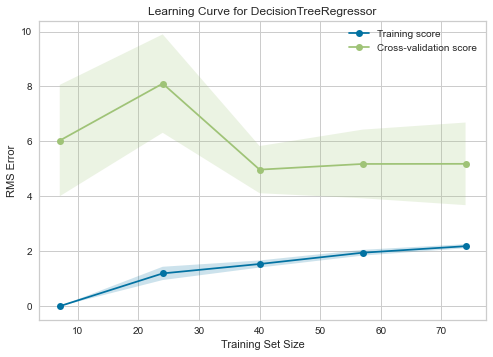

In [22]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [23]:
X = X.to_numpy()
y = y.to_numpy()


In [24]:
y_Test=y_Test.to_numpy()

In [25]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 3.826414

Root Mean squared error: 5.608427

Root Mean squared error: 4.610368

Root Mean squared error: 5.439250

Root Mean squared error: 6.104780

Root Mean squared error: 5.228083

Root Mean squared error: 5.182687

Root Mean squared error: 6.496084

Root Mean squared error: 3.201207

Root Mean squared error: 3.857528

error COV--->0    1.054226
dtype: float64  error mean --->0    2.987353
Name: mean, dtype: float64  error std --->0    3.149346
Name: std, dtype: float64


# train score

In [26]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.773896
dtype: float64  error mean --->0    1.902262
Name: mean, dtype: float64  error std --->0    1.472152
Name: std, dtype: float64


---
---

# Grid search

In [61]:
max_features = ['auto','sqrt',0.5]
max_depth = [5,10,20,25,30]
min_samples_split = [0.05,0.06,0.07,0.08,0.09,0.1]
min_samples_leaf = [0.009,0.01,0.02,0.03,0.05]
criterion=['mse','mae','friedman_mse','poisson']
max_leaf_nodes = [2,3,4,5,6,7]

Decision_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'criterion': criterion}

max_features = ['auto','sqrt',0.5]
max_depth = [5,10,20,25,30]
min_samples_split = [0.05,0.06,0.07,0.08,0.09,0.1]
min_samples_leaf = [0.009,0.01,0.02,0.03,0.05]
criterion=['mse','mae']
max_leaf_nodes = [2,5,7,9,10,11,12,13,14,15,20,25,30]

Decision_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'criterion': criterion}

In [62]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

In [63]:
rf = DecisionTreeRegressor()
reg = GridSearchCV(rf,param_grid = Decision_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 10800 candidates, totalling 108000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 6296 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 12136 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 19256 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 27688 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 37400 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 48424 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 60728 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 74344 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 89240 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 105448 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 108000 out of 108000 | elapsed:  2.7min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse', 'poisson'],
                         'max_depth': [5, 10, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [0.009, 0.01, 0.02, 0.03, 0.05],
                         'min_samples_split': [0.05, 0.06, 0.07, 0.08, 0.09,
                                               0.1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [64]:
reg.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=25, max_features=0.5,
                      max_leaf_nodes=6, min_samples_leaf=0.02,
                      min_samples_split=0.06)

---
---

In [20]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

In [21]:
# #Chest
# mod=DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='auto',max_leaf_nodes=7, min_samples_leaf=0.009,min_samples_split=0.05)
# Neck
# mod=DecisionTreeRegressor(criterion='friedman_mse', max_depth=20, max_features=0.5,max_leaf_nodes=5, min_samples_leaf=0.05,min_samples_split=0.1)
# #Head acc
# mod=DecisionTreeRegressor(criterion='mae', max_depth=20, max_features=0.5,max_leaf_nodes=6, min_samples_leaf=0.01,min_samples_split=0.09)
#HIC
mod=DecisionTreeRegressor(criterion='mae', max_depth=25, max_features=0.5,max_leaf_nodes=6, min_samples_leaf=0.02,min_samples_split=0.06)

In [22]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [23]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')
kf=cv

## Learning Curve

<Figure size 576x396 with 0 Axes>

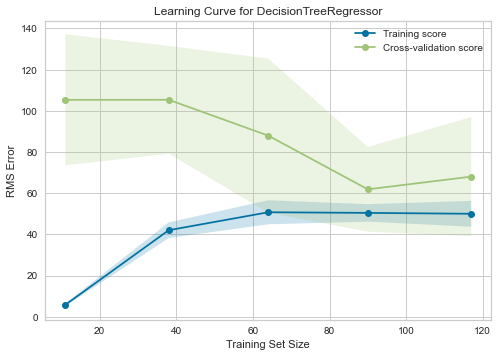

In [24]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [25]:
pd.DataFrame(test_mean)

,0
0,105.316073
1,105.350646
2,87.928428
3,61.868936
4,68.022449


## Unknown data test

In [49]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.149483

Root Mean squared error: 0.121553

Root Mean squared error: 0.118803

Root Mean squared error: 0.204660

Root Mean squared error: 0.111240

Root Mean squared error: 0.097543

Root Mean squared error: 0.112590

Root Mean squared error: 0.104920

Root Mean squared error: 0.228451

Root Mean squared error: 0.143292

error COV--->0    0.74922
dtype: float64  error mean --->0    0.130169
Name: mean, dtype: float64  error std --->0    0.097525
Name: std, dtype: float64


# train score

In [50]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.024457
dtype: float64  error mean --->0    0.072753
Name: mean, dtype: float64  error std --->0    0.074533
Name: std, dtype: float64


In [51]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('head/DTun.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('head/DTtr.csv')